In [21]:
# Import required libraries
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import os

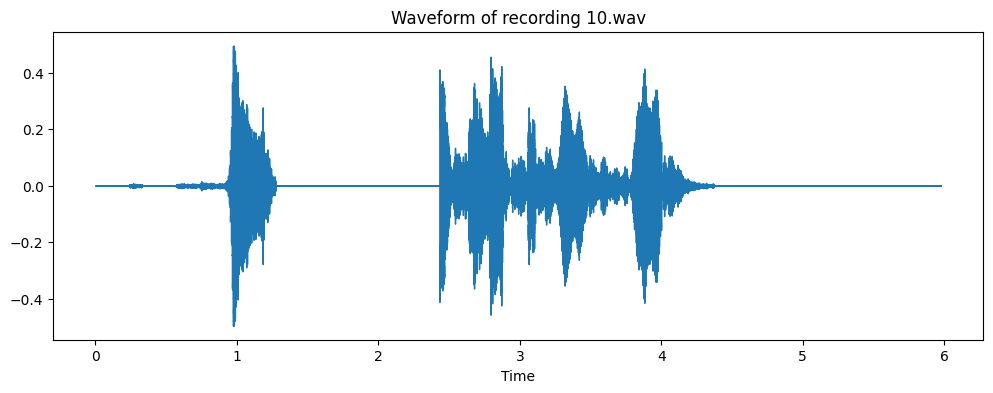

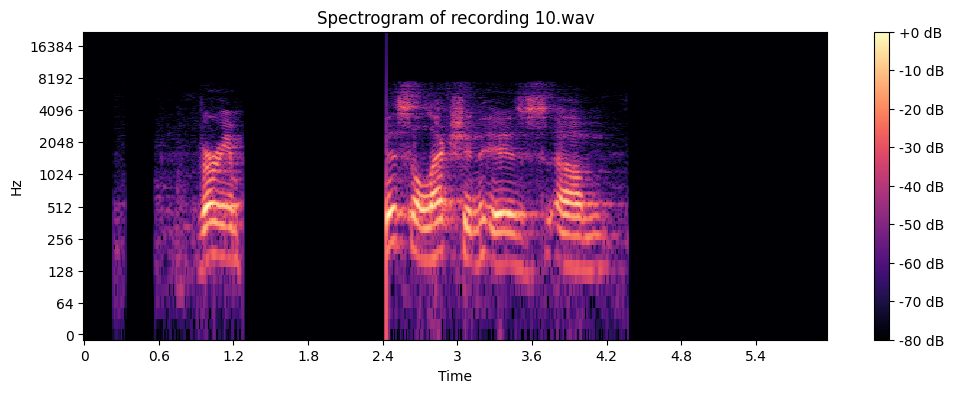

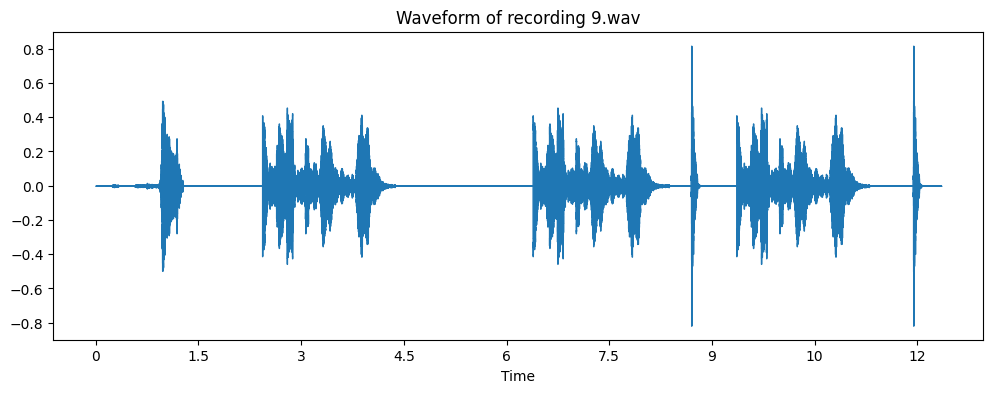

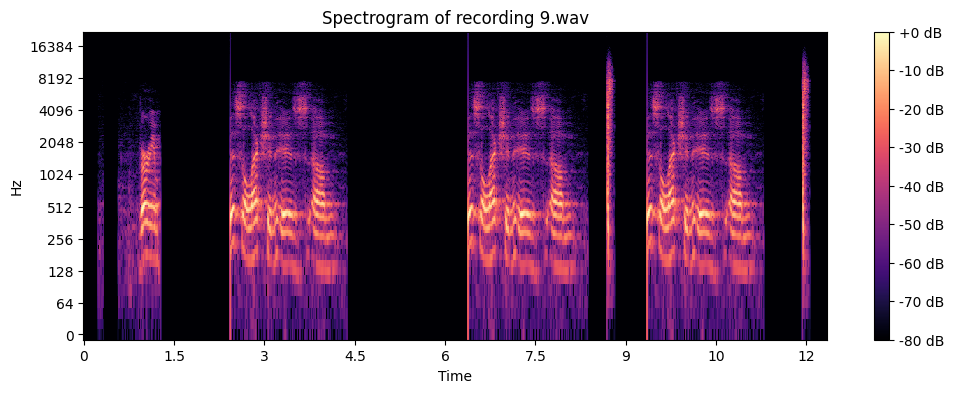

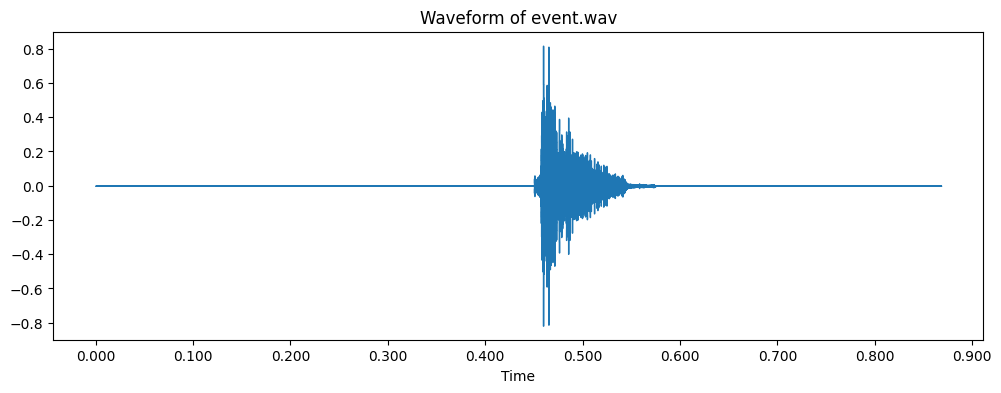

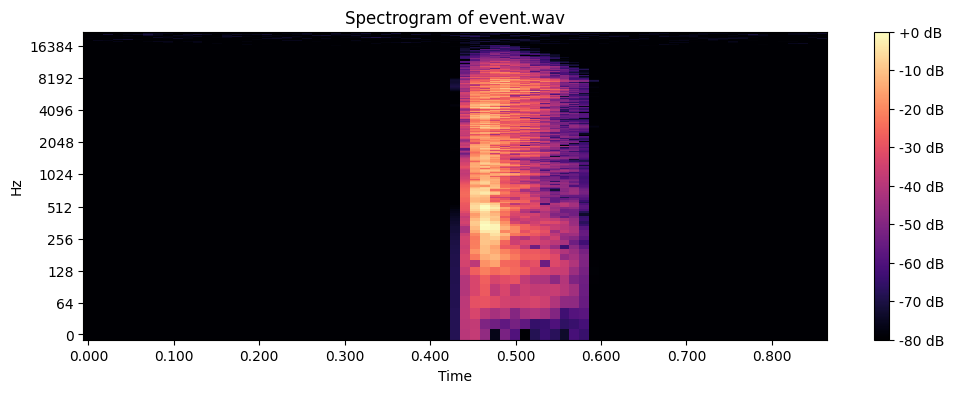

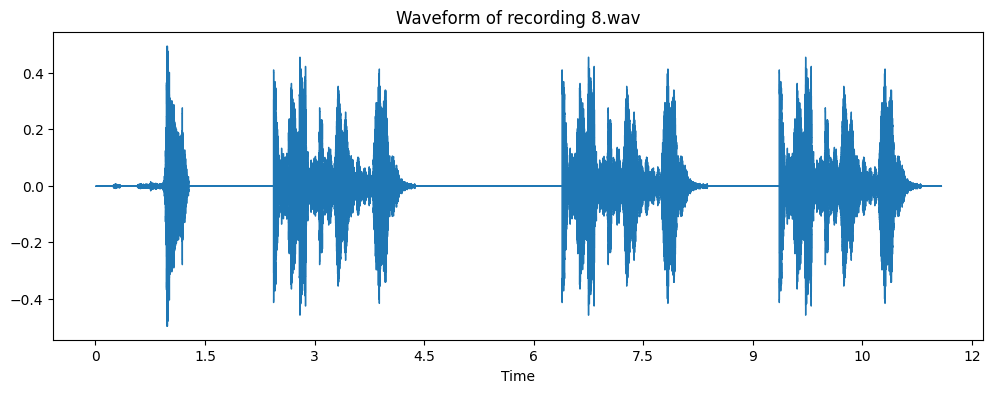

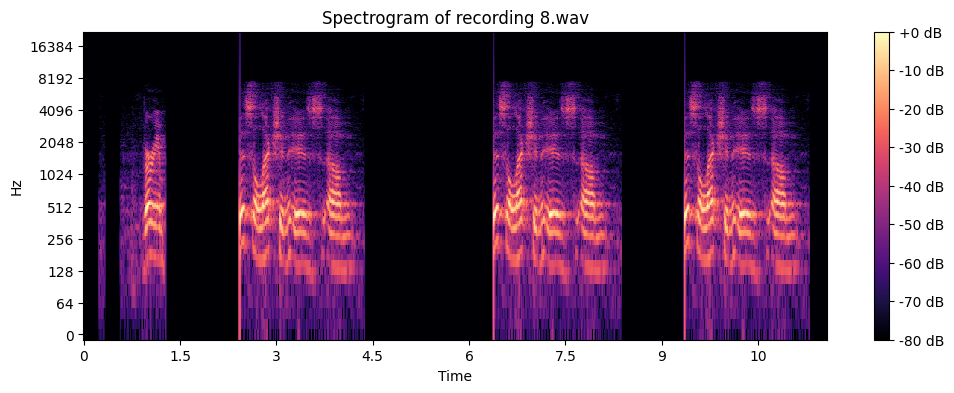

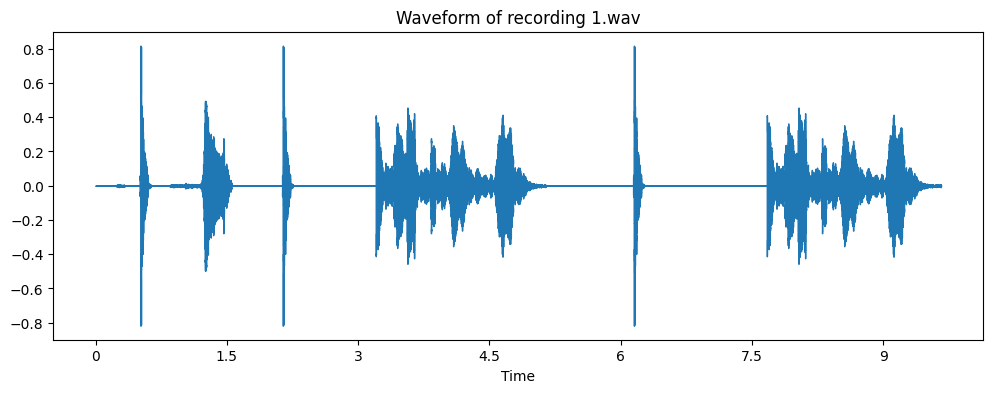

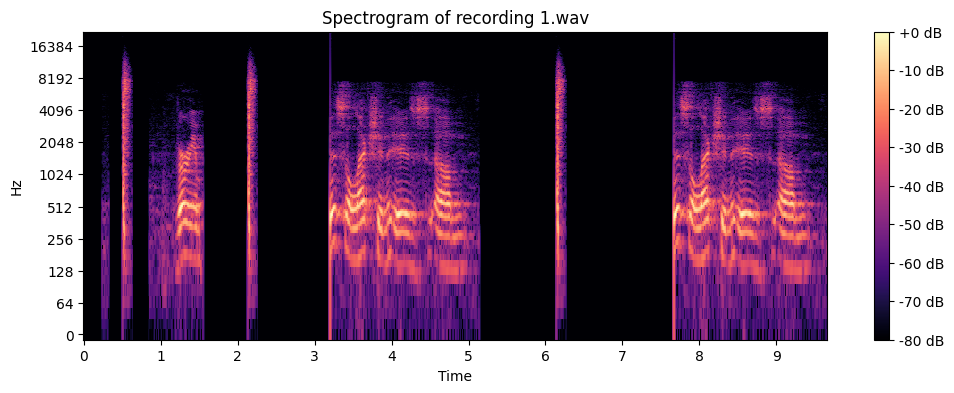

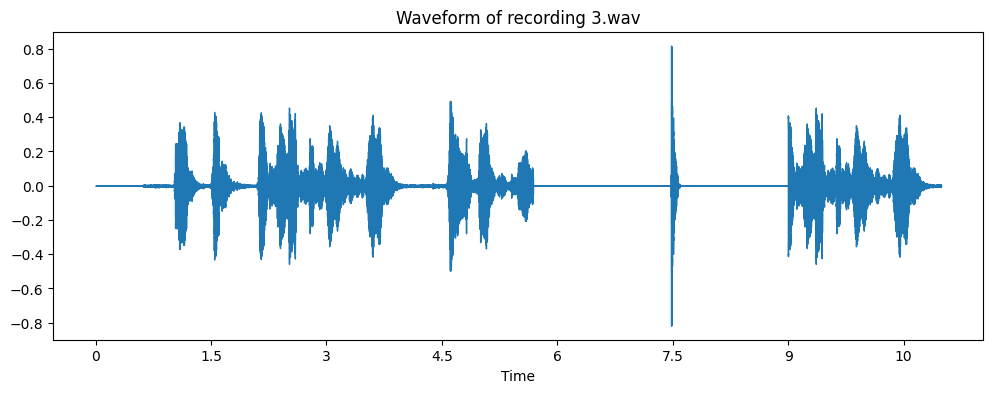

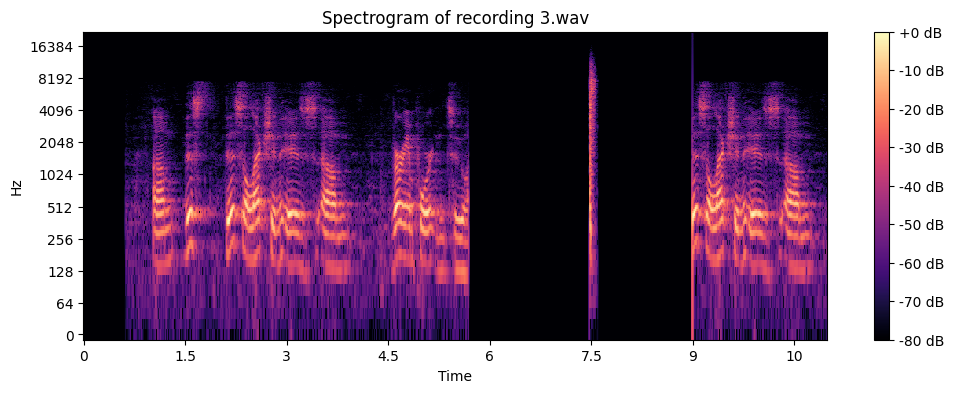

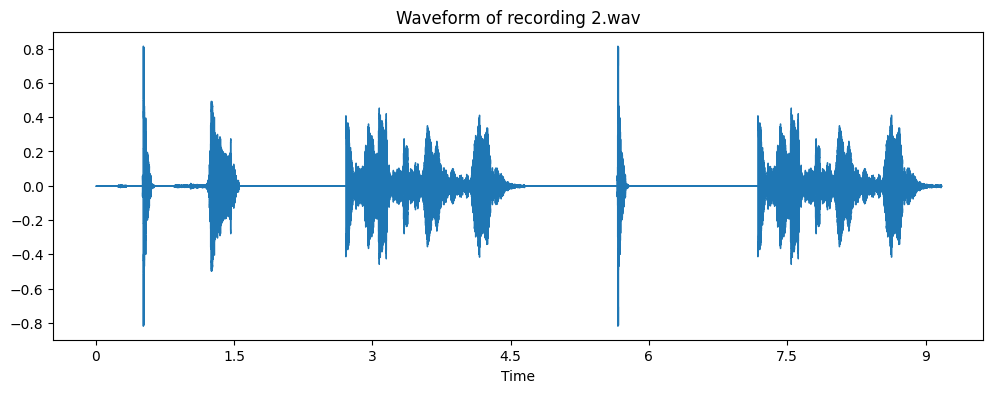

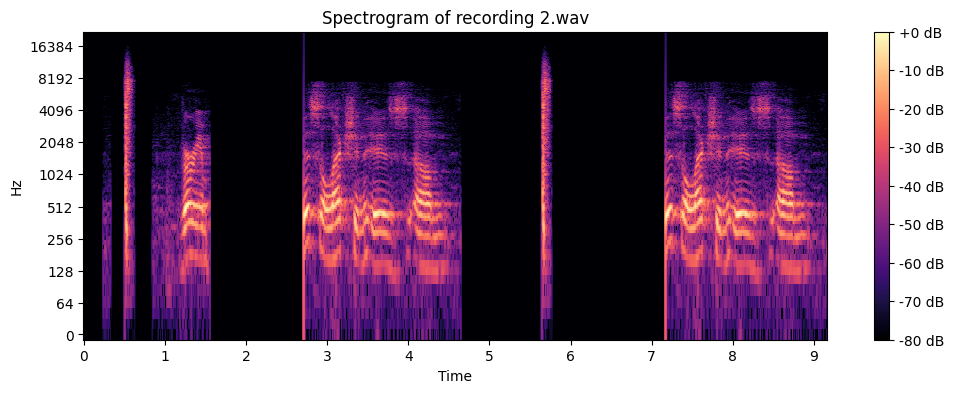

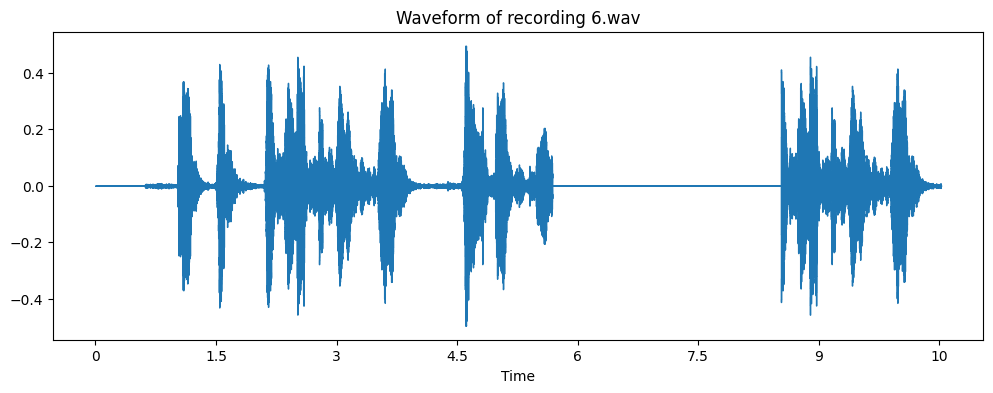

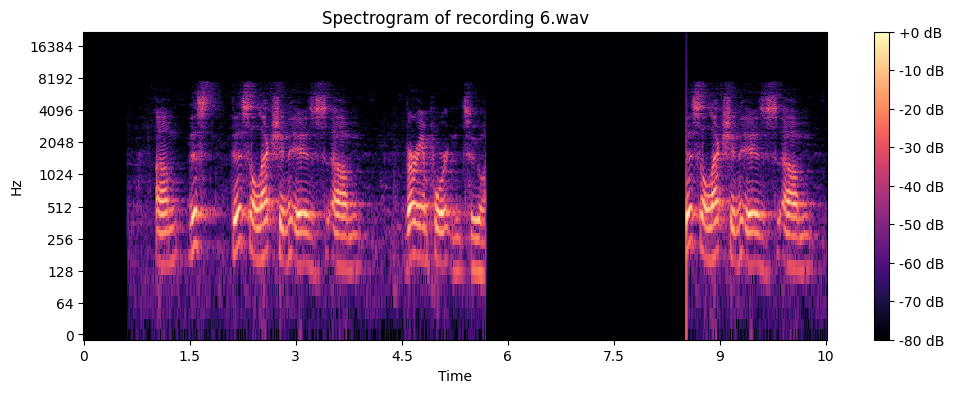

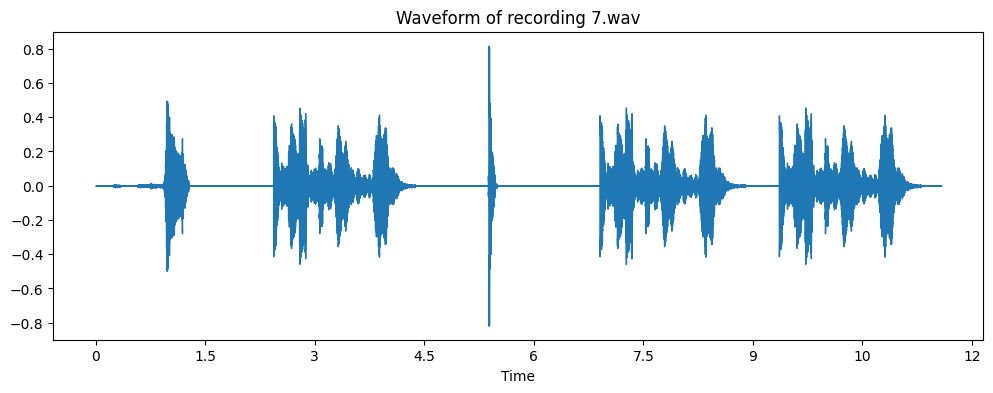

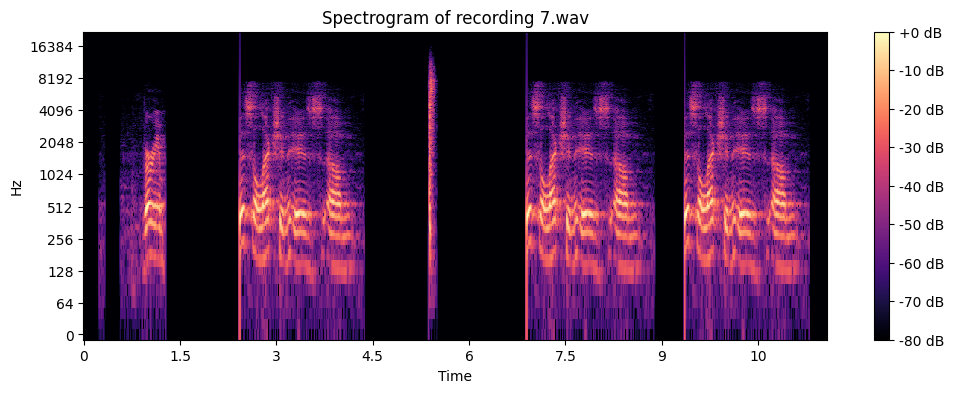

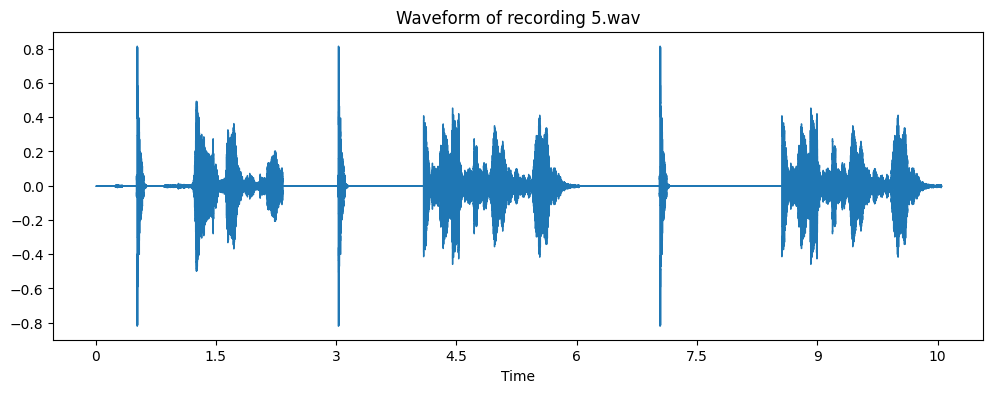

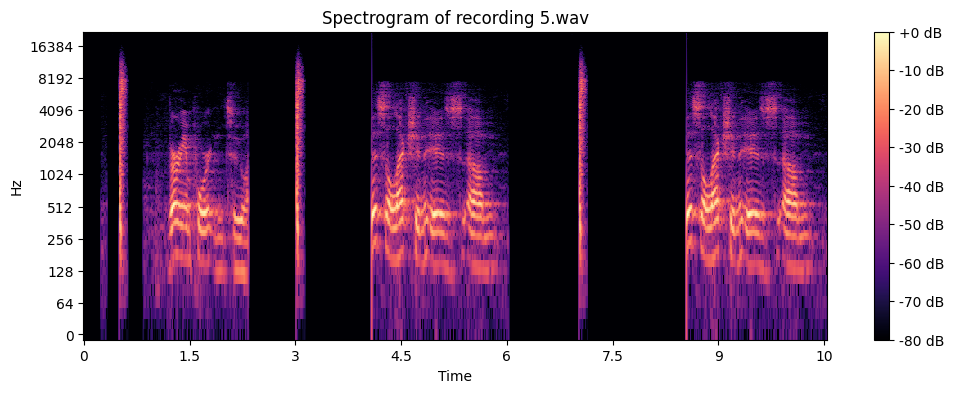

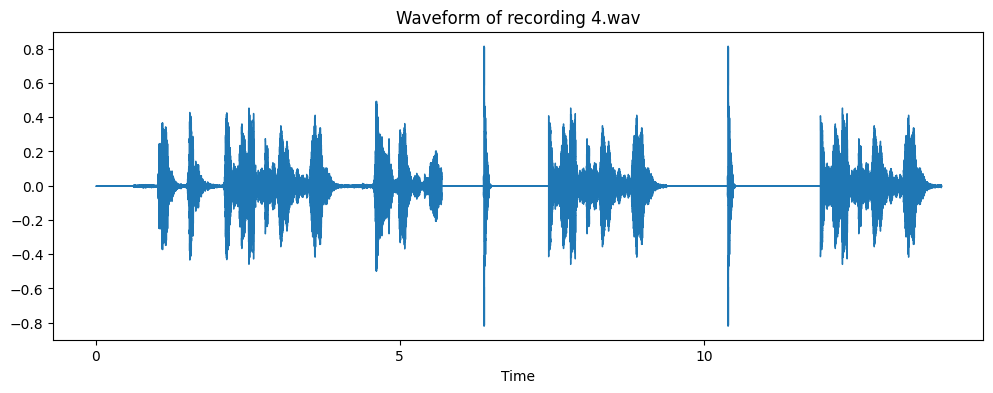

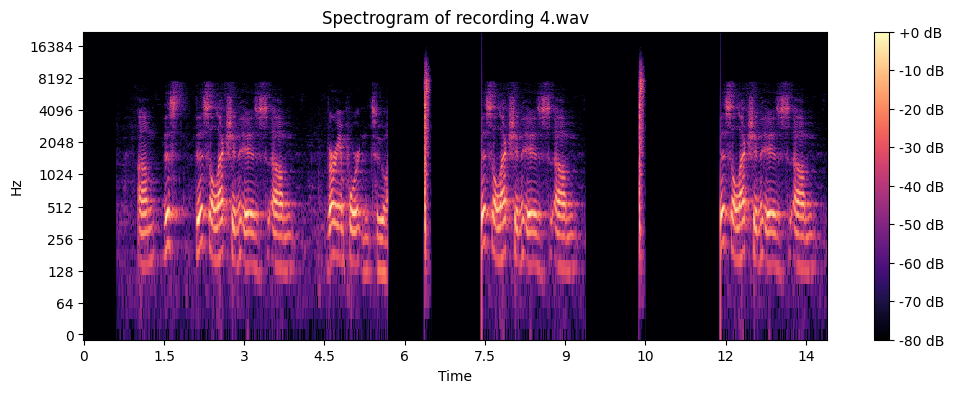

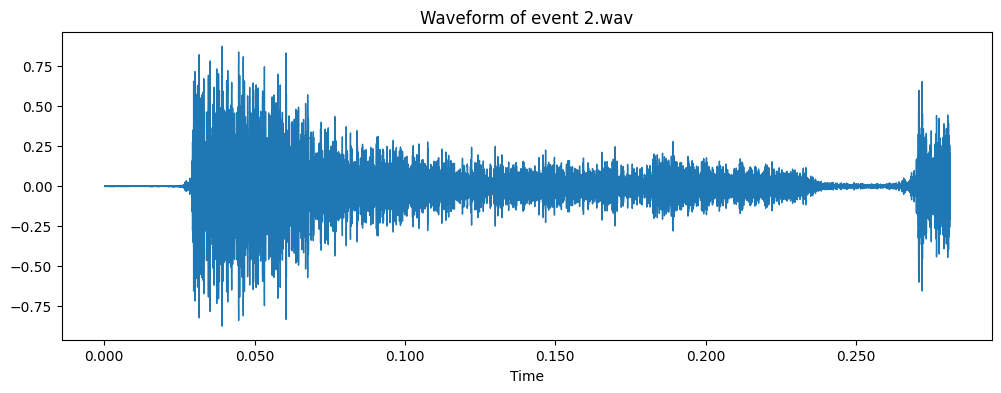

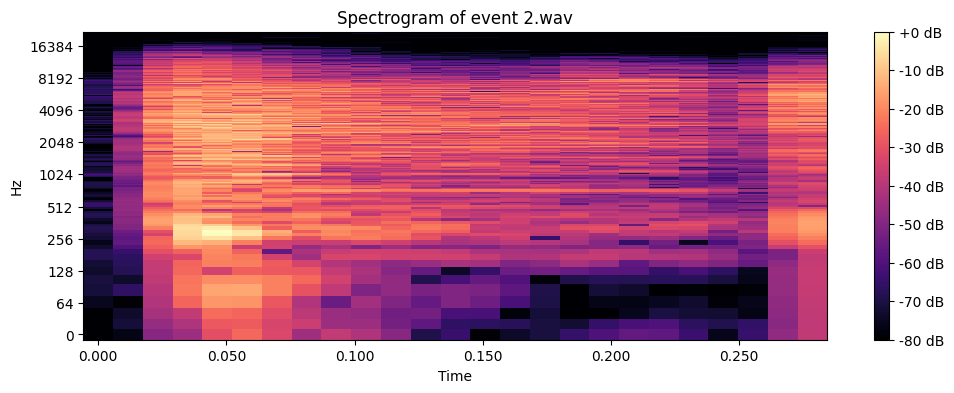

In [22]:
# Import the os module
import os

# Folder containing audio files
audio_folder = '../data/processed/'

# Initialize lists for features and labels
features = []
labels = []

# Iterate through all files in the folder
for file_name in os.listdir(audio_folder):
    if file_name.endswith('.wav'):
        file_path = os.path.join(audio_folder, file_name)
        
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs = np.mean(mfccs.T, axis=0)
        
        # Append features and label (example: label from file name)
        features.append(mfccs)
        labels.append(1 if 'event' in file_name else 0)  # Example labeling logic

# Plot waveform and spectrogram of all audio files
for file_name in os.listdir(audio_folder):
    if file_name.endswith('.wav'):
        file_path = os.path.join(audio_folder, file_name)
        
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Plot waveform
        plt.figure(figsize=(12, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f'Waveform of {file_name}')
        plt.show()
        
        # Plot spectrogram
        plt.figure(figsize=(12, 4))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
        plt.title(f'Spectrogram of {file_name}')
        plt.colorbar(format='%+2.0f dB')
        plt.show()

# Convert to numpy arrays
X = np.array(features)
y = np.array(labels)

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Print classification report
unique_labels = np.unique(y_test)
target_names = ['No Event' if label == 0 else 'Event' for label in unique_labels]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Event       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

